<a href="https://colab.research.google.com/github/Renata-Romanelli/ML_stroke_prediction/blob/main/DecisionTrees_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing Decision Tree Classifier algorithm to classify patient in Stroke of Healthy based on results of Cerebral Autoregulaiton methods

Cerebral Autoregulaiton results (features):
- Transfer Function analysis (Gain, Phase and Coherence)
- Autoregulaiton Index - ARI
- Autoregressive Moving Average ARI - ARMA-ARI
- Mean Flow Index - nMx

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd

df = pd.read_csv('control&stroke_TOTALacceptance1_new.csv', sep=';')   #Can not share this file
pd.set_option("display.max.columns", None)
df.head()

,Paciente,NIHSS_init,NIHSS_med,mRS,Hemisferio,tipo,stroke_type_NIHSSmed,type_num,type_num2,poor_functional,centro,GanhoVLF,GanhoLF,GanhoHF,FaseVLF,FaseLF,FaseHF,CohVLF,CohLF,CohHF,ARI,ARI_ARMA,nMx,ari_compromisedAC,acceptance
0,P01BA1A1,3,0,0,E,stroke,mild,1,0,0,Brasil,1.372,1.469,2.001,0.694,0.466,-0.327,0.959,0.882,0.579,4.169,4.91,0.6170,0,1
1,NaN,3,0,0,D,stroke,mild,1,0,0,Brasil,1.270,1.129,2.088,0.940,0.827,0.827,0.922,0.757,0.493,6.724,5.17,0.4903,0,1
2,P02BA1A1,9,12,5,E,stroke,moderate,1,1,1,Brasil,1.497,1.527,2.076,0.622,0.543,0.118,0.860,0.898,0.935,3.255,7.04,0.7160,1,1
3,NaN,9,12,5,D,stroke,moderate,1,1,1,Brasil,1.497,1.527,2.075,0.622,0.543,0.118,0.860,0.898,0.934,3.254,7.04,0.7160,1,1
4,P03A1BA1,10,8,1,E,stroke,moderate,1,1,0,Brasil,1.093,1.050,1.038,1.168,0.526,0.164,0.697,0.415,0.829,4.803,3.01,0.4889,1,1


In [ ]:
df.columns

Index(['Paciente', 'NIHSS_init', 'NIHSS_med', 'mRS', 'Hemisferio', 'tipo',
       'stroke_type_NIHSSmed', 'type_num', 'type_num2', 'poor_functional',
       'centro', 'GanhoVLF', 'GanhoLF', 'GanhoHF', 'FaseVLF', 'FaseLF',
       'FaseHF', 'CohVLF', 'CohLF', 'CohHF', 'ARI', 'ARI_ARMA', 'nMx',
       'ari_compromisedAC', 'acceptance'],
      dtype='object')

In [ ]:
cols = {'type_num':'stroke', 'type_num2':'stroke_severe'}

df.rename(cols, inplace=True, axis=1)
df.drop(['Paciente', 'NIHSS_med'], inplace=True, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NIHSS_init            145 non-null    int64  
 1   mRS                   145 non-null    int64  
 2   Hemisferio            145 non-null    object 
 3   tipo                  145 non-null    object 
 4   stroke_type_NIHSSmed  145 non-null    object 
 5   stroke                145 non-null    int64  
 6   stroke_severe         145 non-null    int64  
 7   poor_functional       145 non-null    int64  
 8   centro                145 non-null    object 
 9   GanhoVLF              145 non-null    float64
 10  GanhoLF               145 non-null    float64
 11  GanhoHF               145 non-null    float64
 12  FaseVLF               145 non-null    float64
 13  FaseLF                145 non-null    float64
 14  FaseHF                145 non-null    float64
 15  CohVLF                1

In [ ]:
df['stroke'].value_counts()

1    76
0    69
Name: stroke, dtype: int64

In [ ]:
df['stroke_severe'].value_counts()

0    89
1    56
Name: stroke_severe, dtype: int64

In [ ]:
def removeoutlier(values):
  values = values.copy()
  fator = 1.5
  q3, q1 = np.percentile(values, [75, 25])
  iqr = q3 - q1
  lowpass = q1 - (iqr*fator)
  highpass = q3 + (iqr*fator)

  values[(values < lowpass) + (values > highpass)] = values.median()

  return values

In [ ]:
df.GanhoVLF = removeoutlier(df.GanhoVLF)
df.GanhoLF = removeoutlier(df.GanhoLF)
df.GanhoHF = removeoutlier(df.GanhoHF)
df.FaseVLF = removeoutlier(df.FaseVLF)
df.FaseLF = removeoutlier(df.FaseLF)
df.FaseHF = removeoutlier(df.FaseHF)
df.ARI = removeoutlier(df.ARI)
df.ARI_ARMA = removeoutlier(df.ARI_ARMA)
df.nMx = removeoutlier(df.nMx)

Text(0.5, 1.0, '')

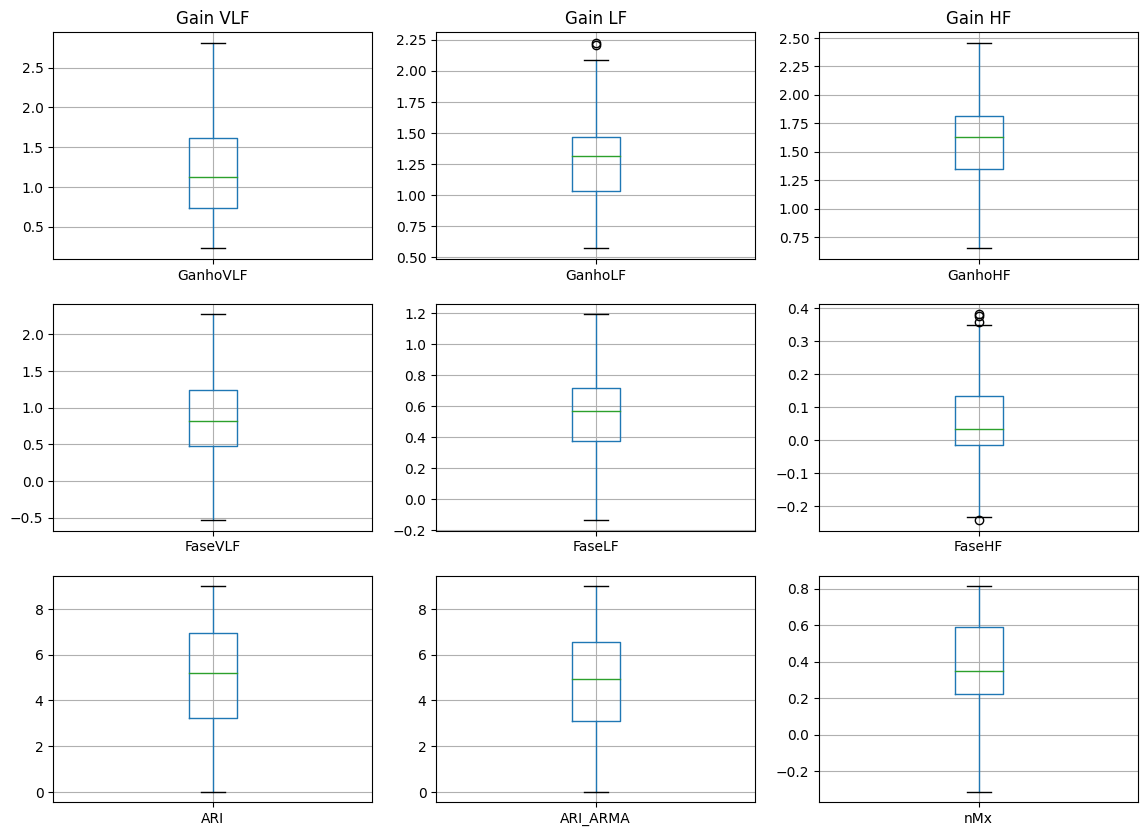

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(14,10))

plt.subplot(3, 3, 1)
fig = df.boxplot(column='GanhoVLF')
fig.set_title('Gain VLF')

plt.subplot(3, 3, 2)
fig = df.boxplot(column='GanhoLF')
fig.set_title('Gain LF')

plt.subplot(3, 3, 3)
fig = df.boxplot(column='GanhoHF')
fig.set_title('Gain HF')

plt.subplot(3, 3, 4)
fig = df.boxplot(column='FaseVLF')
fig.set_title('')

plt.subplot(3, 3, 5)
fig = df.boxplot(column='FaseLF')
fig.set_title('')

plt.subplot(3, 3, 6)
fig = df.boxplot(column='FaseHF')
fig.set_title('')

plt.subplot(3, 3, 7)
fig = df.boxplot(column='ARI')
fig.set_title('')

plt.subplot(3, 3, 8)
fig = df.boxplot(column='ARI_ARMA')
fig.set_title('')

plt.subplot(3, 3, 9)
fig = df.boxplot(column='nMx')
fig.set_title('')

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import tree

def executar_validador(x, y):
  validador = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=0)
  for treino_id, teste_id in validador.split(x,y):
    x_train, x_test = x[treino_id], x[teste_id]
    y_train, y_test = y[treino_id], y[teste_id]
  return x_train, x_test, y_train, y_test

def executar_classificador(classificador, x_train, x_test, y_train):
  arvore = classificador.fit(x_train, y_train)
  y_pred = arvore.predict(x_test)
  return y_pred

def salvar_arvore(classificador, nome):
  plt.figure(figsize=(200,100))
  tree.plot_tree(classificador, filled=True, fontsize=14)
  plt.savefig(nome)
  plt.close()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc

def ROC_curve(y_pred):

  fpr, tpr, threshold = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  # print('AUC: {}'.format(round(roc_auc,2)))

  # plt.title('Receiver Operating Characteristic')
  # plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  # plt.legend(loc = 'lower right', fontsize=17)
  # plt.plot([0, 1], [0, 1],'r--')
  # plt.ylabel('Taxa de verdadeiros positivos', fontsize=15)
  # plt.xlabel('Taxa de verdadeiros negativos', fontsize=15)
  # plt.show()
  return roc_auc

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def validar_arvore(y_test, y_pred):
  print('acuracia: ', accuracy_score(y_test, y_pred))
  print('precisao: ', precision_score(y_test, y_pred))
  print('recall score: ',recall_score(y_test, y_pred))
  print('AUC: ',ROC_curve(y_pred))
  print('confusion matrix:\n',confusion_matrix(y_test, y_pred))

In [ ]:
# Outras bibliotecas utilizadas mais a frente

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Declare feature vector and target variable

df_svm = df[['GanhoVLF', 'type_num']]
x = df_svm.drop(['type_num'], axis=1).values
y = df_svm['type_num'].values

## Árvore de decisão com test_size = 0.1

In [ ]:
#execução do validador

x_train, x_test, y_train, y_test = executar_validador(x, y)

#Execuçaõ do classificador

classificador_arvore_decisao = tree.DecisionTreeClassifier()
y_pred_arvore_decisao = executar_classificador(classificador_arvore_decisao, x_train, x_test, y_train)

#Validar a arvore de decisão
validar_arvore(y_test, y_pred_arvore_decisao)

acuracia:  0.5862068965517241
precisao:  0.6
recall score:  0.6
AUC:  0.5857142857142856
confusion matrix:
 [[8 6]
 [6 9]]


In [ ]:
#Limite de profundidade = 10

#Execuçaõ do classificador
classificador_arvore_decisao = tree.DecisionTreeClassifier(max_depth=10, random_state=0)
y_pred_arvore_decisao = executar_classificador(classificador_arvore_decisao, x_train, x_test, y_train)
validar_arvore(y_test, y_pred_arvore_decisao)

acuracia:  0.5517241379310345
precisao:  0.5714285714285714
recall score:  0.5333333333333333
AUC:  0.5523809523809523
confusion matrix:
 [[8 6]
 [7 8]]


In [ ]:
# Limite de amostras por folha = 10

#Execuçaõ do classificador
classificador_arvoro_decisao = tree.DecisionTreeClassifier(max_depth=10, random_state=0, min_samples_leaf=10)
y_pred_arvore_decisao = executar_classificador(classificador_arvoro_decisao, x_train, x_test, y_train)
validar_arvore(y_test, y_pred_arvore_decisao)

acuracia:  0.41379310344827586
precisao:  0.4166666666666667
recall score:  0.3333333333333333
AUC:  0.41666666666666663
confusion matrix:
 [[ 7  7]
 [10  5]]


In [ ]:
# Limite de profundidade = 5

#Execuçaõ do classificador
classificador_arvoro_decisao = tree.DecisionTreeClassifier(max_depth=5, random_state=0)
y_pred_arvore_decisao = executar_classificador(classificador_arvoro_decisao, x_train, x_test, y_train)
validar_arvore(y_test, y_pred_arvore_decisao)

acuracia:  0.41379310344827586
precisao:  0.4
recall score:  0.26666666666666666
AUC:  0.419047619047619
confusion matrix:
 [[ 8  6]
 [11  4]]


#Ensemble Learning

Random Forest

In [ ]:
classificador_random_forest = RandomForestClassifier(n_estimators=50, random_state=0, max_depth=10)
y_pred_random_forest = executar_classificador(classificador_random_forest, x_train, x_test, y_train)
validar_arvore(y_test, y_pred_random_forest)

acuracia:  0.5909090909090909
precisao:  0.4444444444444444
recall score:  0.5
AUC:  0.5714285714285714
confusion matrix:
 [[9 5]
 [4 4]]


# AdaBoost


In [ ]:
classificador_adaboost = AdaBoostClassifier(random_state=0)
y_pred_adaboost = executar_classificador(classificador_adaboost,  x_train, x_test, y_train)
validar_arvore(y_test, y_pred_adaboost)

acuracia:  0.6666666666666666
precisao:  0.6
recall score:  0.5
AUC:  0.638888888888889
confusion matrix:
 [[7 2]
 [3 3]]


In [ ]:
#melhorar atributos

classificador_adaboost = AdaBoostClassifier(random_state=0, n_estimators=100)
y_pred_adaboost = executar_classificador(classificador_adaboost,  x_train, x_test, y_train)
validar_arvore(y_test, y_pred_adaboost)

acuracia:  0.6
precisao:  0.5
recall score:  0.5
AUC:  0.5833333333333334
confusion matrix:
 [[6 3]
 [3 3]]
